In [1]:
pip install pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorFlow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
 #Ejercio 01

In [5]:
pip install tensorFlow

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_27612/2939483150.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


    CASE#      DATE OF OCCURRENCE                                BLOCK  IUCR  \
0  406115  08/31/2023 07:00:00 PM                 042XX W MARQUETTE RD  0498   
1  425966  09/15/2023 11:20:00 PM                      010XX W 84TH ST  0486   
2  412467  08/31/2023 09:13:00 PM                   093XX S WABASH AVE  0910   
3  426285  09/15/2023 06:00:00 PM  057XX S DR MARTIN LUTHER KING JR DR  1320   
4  178504  03/07/2024 01:50:00 AM                    059XX W FULTON ST  0486   

           DESCRIPTION                              SECONDARY DESCRIPTION  \
0              BATTERY  AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...   
1              BATTERY                            DOMESTIC BATTERY SIMPLE   
2  MOTOR VEHICLE THEFT                                         AUTOMOBILE   
3      CRIMINAL DAMAGE                                         TO VEHICLE   
4              BATTERY                            DOMESTIC BATTERY SIMPLE   

                     LOCATION DESCRIPTION ARREST DOMESTI

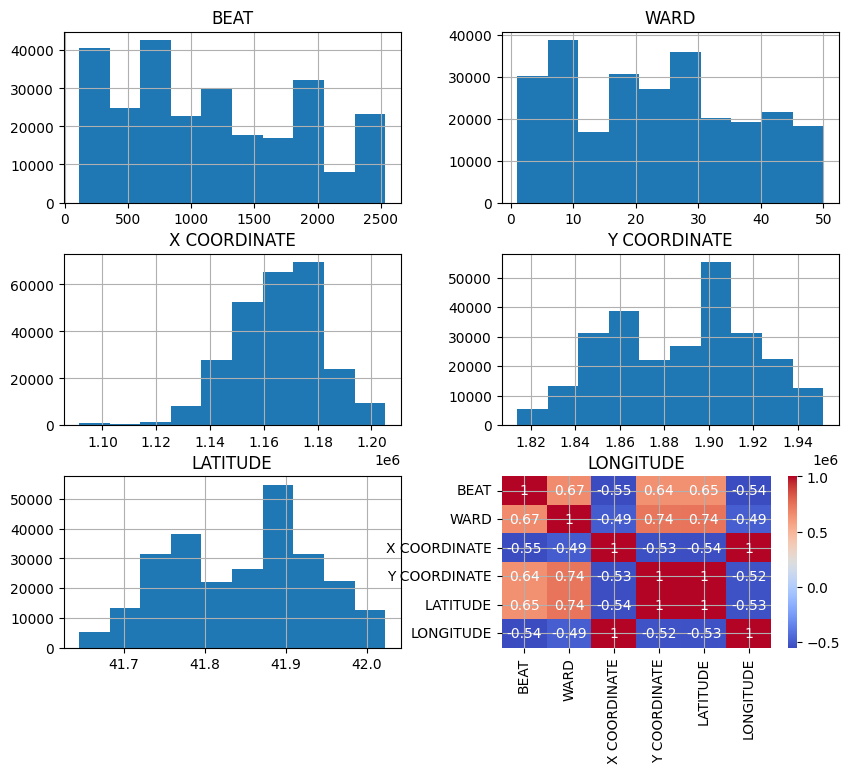

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import numpy as np

# Cargar los datos
data = pd.read_csv('data.csv')

# Mostrar las primeras filas 
print(data.head())

# Descripcion estadistica de los datos numericos
print(data.describe())

print(data.info())

# Distribucion de caracteristicas categoria
categoria_columns = ['DESCRIPTION','SECONDARY DESCRIPTION','LOCATION DESCRIPTION']
for col in categoria_columns:
    print(f"Distribucion de {col}")
    print(data[col].value_counts())

# Histograma de las caractersticas numericas
data.hist(figsize=(10,8))
# plt.show()

# Extraer solo los números de la columna 'CASE#'
data_cleaned_case_numeric = data.copy()
data['CASE#'] = pd.to_numeric(data['CASE#'], errors='coerce')

# Se separa solo los datos numericos
data_numeric = data_cleaned_case_numeric.select_dtypes(include=[np.number])

# Mapa de calor de la correlación
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
#Ejercio 02

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import re
import numpy as np

# Limpiar los datos eliminando filas con valores nulos
data_cleaned = data.dropna()

# Convertir características categóricas a numéricas
label_encoders = {}
categorical_columns = ['DESCRIPTION', 'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION']

#print(data_cleaned.info())


for col in categorical_columns:
    le = LabelEncoder()
    #data_cleaned[col] = le.fit_transform(data_cleaned[col])
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Extraer solo los números de la columna 'CASE#'
data_cleaned_case_numeric = data.copy()
data['CASE#'] = pd.to_numeric(data['CASE#'], errors='coerce')

# Separar las características y el objetivo
X = data_cleaned_case_numeric.drop(columns=['ARREST', 'DOMESTIC', 'CASE#'])
y_arrest = data_cleaned_case_numeric['ARREST']
y_domestic = data_cleaned_case_numeric['DOMESTIC']


# Se separa solo los datos numericos
X_numeric = X.select_dtypes(include=[np.number])

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2, random_state=42)
X_train, X_test, y_domestic_train, y_domestic_test = train_test_split(X_scaled, y_domestic, test_size=0.2, random_state=42)


In [19]:
# Ejerciccio 3

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Entrenar un modelo de clasificación de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_arrest_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Informar de clasificación
print(classification_report(y_arrest_test, y_pred))

              precision    recall  f1-score   support

           N       0.90      0.95      0.92     45532
           Y       0.35      0.19      0.24      6215

    accuracy                           0.86     51747
   macro avg       0.62      0.57      0.58     51747
weighted avg       0.83      0.86      0.84     51747



In [20]:
# EJERCICO 4

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Entrenar un modelo de regresión de Random Forest
reg_latitude = RandomForestRegressor(random_state=42)
reg_longitude = RandomForestRegressor(random_state=42)

# Separar el objetivo de regresión
y_latitude = data_cleaned['LATITUDE']
y_longitude = data_cleaned['LONGITUDE']

# Dividir los datos
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_scaled, y_latitude, test_size=0.2, random_state=42)
X_train_long, X_test_long, y_train_long, y_test_long = train_test_split(X_scaled, y_longitude, test_size=0.2, random_state=42)

# Entrenar modelos
reg_latitude.fit(X_train_lat, y_train_lat)
reg_longitude.fit(X_train_long, y_train_long)

# Predecir y evaluar los modelos
y_pred_lat = reg_latitude.predict(X_test_lat)
y_pred_long = reg_longitude.predict(X_test_long)

print("MAE Latitud:", mean_absolute_error(y_test_lat, y_pred_lat))
print("MSE Latitud:", mean_squared_error(y_test_lat, y_pred_lat))
print("MAE Longitud:", mean_absolute_error(y_test_long, y_pred_long))
print("MSE Longitud:", mean_squared_error(y_test_long, y_pred_long))

In [24]:
# EJERCICIO 5

/tmp/ipykernel_27612/2086816797.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])


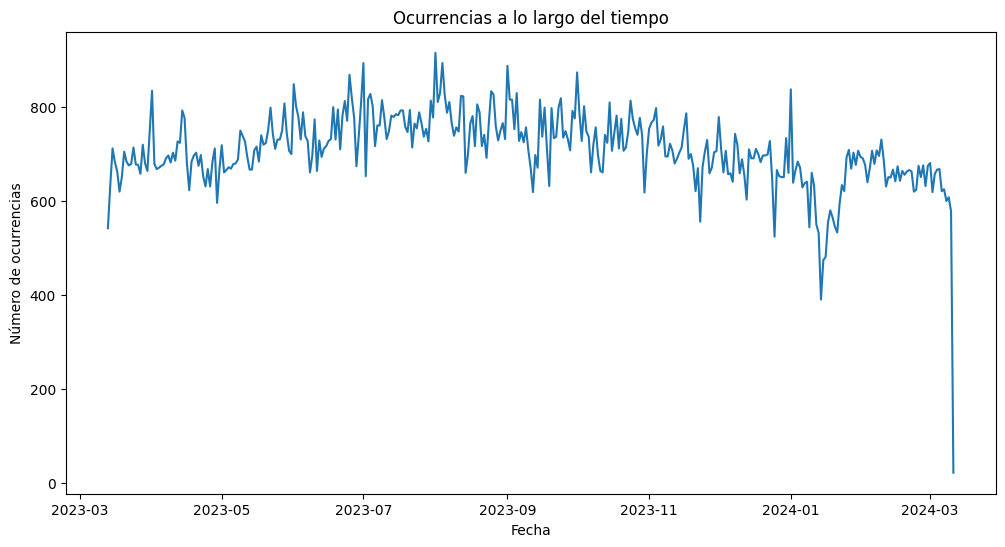

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna de fecha a tipo datetime
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])

# Agrupar datos por fecha y contar ocurrencias
time_series = data.groupby(data['DATE OF OCCURRENCE'].dt.date).size()
# Graficar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title("Ocurrencias a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de ocurrencias")
plt.show()

In [ ]:
# EJERCICIO 6

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un GeoDataFrame a partir de los datos
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['LONGITUDE'], data['LATITUDE']))

# Cargar los datos del archivo descargado
world = gpd.read_file('/home/jovyan/work/110m_cultural/ne_110m_admin_0_countries.shp')
# /home/johancm/repos-ucc/ucc-data-mining/students/jcmv-2k24s1/taller-ml-y-dl/110m_cultural/ne_110m_admin_0_countries.shp

# Plotear los datos en un mapa
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title("Ocurrencias geográficas")
plt.show()

In [ ]:
# EJERCICIO 7

In [ ]:
from sklearn.ensemble import IsolationForest

# Entrenar un modelo de Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)

# Predecir anomalías en el conjunto de prueba
y_pred_anomaly = iso_forest.predict(X_test)

# Contar el número de anomalías
num_anomalies = sum(y_pred_anomaly == -1)
print(f"Número de anomalías: {num_anomalies}")

In [ ]:
# EJERCICIO 8

In [ ]:
pip install mlxtend

In [30]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convertir los datos categóricos a formato de conjuntos
categorical_columns = ['DESCRIPTION', 'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION']
data_categorical = data[categorical_columns]
data_categorical_one_hot = pd.get_dummies(data_categorical)

# Aplicar el algoritmo de Apriori
frequent_itemsets = apriori(data_categorical_one_hot, min_support=0.05, use_colnames=True)

# Extraer reglas de asociación
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)

print(rules)

                                          antecedents  \
0                               (DESCRIPTION_ASSAULT)   
1                      (SECONDARY DESCRIPTION_SIMPLE)   
2     (SECONDARY DESCRIPTION_DOMESTIC BATTERY SIMPLE)   
3                               (DESCRIPTION_BATTERY)   
4                               (DESCRIPTION_BATTERY)   
5                      (SECONDARY DESCRIPTION_SIMPLE)   
6                    (LOCATION DESCRIPTION_APARTMENT)   
7                               (DESCRIPTION_BATTERY)   
8                  (SECONDARY DESCRIPTION_TO VEHICLE)   
9                       (DESCRIPTION_CRIMINAL DAMAGE)   
10                  (DESCRIPTION_MOTOR VEHICLE THEFT)   
11                 (SECONDARY DESCRIPTION_AUTOMOBILE)   
12                  (DESCRIPTION_MOTOR VEHICLE THEFT)   
13                      (LOCATION DESCRIPTION_STREET)   
14                                (DESCRIPTION_THEFT)   
15             (SECONDARY DESCRIPTION_$500 AND UNDER)   
16                             

In [ ]:
# EJERCICIO 9

In [ ]:
pip install shap

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo (usando Random Forest como ejemplo)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_arrest_train)

# Calcular valores SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Visualizar la importancia de las características
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# EJERCICIO 10

In [ ]:
pip install torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Definir la red neuronal
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
        
# Convertir los datos a tensores
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_domestic_train_torch = torch.tensor(y_domestic_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_domestic_test_torch = torch.tensor(y_domestic_test.values, dtype=torch.float32)

# Crear la red y definir la función de pérdida y el optimizador
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Entrenar la red neuronal
num_epochs = 100
for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_torch)
    loss = criterion(outputs, y_domestic_train_torch.view(-1, 1))
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Evaluar la red neuronal
net.eval()
with torch.no_grad():
 outputs_test = net(X_test_torch)
 outputs_test = outputs_test.view(-1).round()
 accuracy = (outputs_test == y_domestic_test_torch).float().mean()
 print(f"Accuracy: {accuracy.item()}")

In [ ]:
# EJERCICIO 11

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Modelos de clasificación
models = {
 'Random Forest': RandomForestClassifier(random_state=42),
 'SVM': SVC(),
 'Logistic Regression': LogisticRegression(random_state=42)
}
# Entrenar y evaluar los modelos
for model_name, model in models.items():
    model.fit(X_train, y_arrest_train)
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print(classification_report(y_arrest_test, y_pred))


In [ ]:
# EJERCICIO 12

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering con KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters KMeans')
plt.show()

In [ ]:
# EJERCICIO 13

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
corr_matrix = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# EJERCICIO 14

In [ ]:
from imblearn.over_sampling import SMOTE

# Manejar el desequilibrio de datos en 'ARREST'
smote = SMOTE(random_state=42)
X_resampled, y_arrest_resampled = smote.fit_resample(X_train, y_arrest_train)

# Entrenar un modelo de clasificación de Random Forest con datos reequilibrados
clf = Random ForestClassifier(random_state=42)
clf.fit(X_resampled, y_arrest_resampled)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_arrest_test, y_pred))

In [ ]:
# EJERCICIO 15

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import Random ForestClassifier
from sklearn.metrics import classification_report

# Entrenar un modelo de árbol de decisión
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_arrest_train)

# Entrenar un modelo de bosque aleatorio
rforest = Random ForestClassifier(random_state=42)
rforest.fit(X_train, y_arrest_train)

# Evaluar el árbol de decisión
y_pred_tree = dtree.predict(X_test)
print("Clasificación con Árbol de Decisión:")
print(classification_report(y_arrest_test, y_pred_tree))

# Evaluar el bosque aleatorio
y_pred_forest = rforest.predict(X_test)
print("Clasificación con Bosque Aleatorio:")
print(classification_report(y_arrest_test, y_pred_forest))

In [ ]:
# EJERCICIO 16

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['PRIMARY DESCRIPTION'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest,
test_size=0.2, random_state=42)

# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))

In [ ]:
# EJERCICIO 17

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['ARREST'].apply(lambda x: 0 if x == 'N' else 1), cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [ ]:
# EJERCICIO 18

In [ ]:
pip install flask

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.ensemble import Random ForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

app = Flask(__name__)

# Cargar el modelo entrenado y otros recursos
model = joblib.load('model_arrest.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')
@app.route('/predict', methods=['POST'])

def predict():
    # Obtener los datos de entrada en formato JSON
    data = request.get_json()
    # Convertir a DataFrame
    df = pd.DataFrame([data])
    # Preprocesar los datos
    df = preprocess_data(df, scaler, label_encoders)
    
    # Hacer predicción
    prediction = model.predict(df)
    
    # Devolver la predicción como JSON
    return jsonify({'prediction': prediction[0]})
    
def preprocess_data(df, scaler, label_encoders):
    # Convertir características categóricas a numéricas
    for col, le in label_encoders.items():
    df[col] = le.transform(df[col])
    
    # Escalar características numéricas
    df_scaled = scaler.transform(df)
    return df_scaled
    
if __name__ == '__main__':
    app.run()


In [ ]:
# Ejercici0 19

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
clf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
 'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10]
}

# Optimización de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_arrest_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_arrest_test, y_pred))


In [ ]:
# EJERCICIO 20

In [ ]:
from fbprophet import Prophet
import pandas as pd

# Preprocesar los datos para Prophet
data['ds'] = data['DATE OF OCCURRENCE']
data['y'] = data.groupby(data['DATE OF OCCURRENCE'].dt.date).size().values

# Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(data)

# Hacer pronósticos futuros
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Visualizar el pronóstico
fig = model.plot(forecast)
plt.show()